In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%matplotlib notebook

import os
cpu='1'
os.environ['CUDA_VISIBLE_DEVICES']=cpu

from bio_learn import *

In [2]:
(train_X, train_y), (test_X, test_y) = get_data('train'), get_data('test')
print('train_data, test_data:', train_X.shape, train_y.shape, test_X.shape, test_y.shape)

train_data, test_data: torch.Size([60000, 784]) torch.Size([60000]) torch.Size([10000, 784]) torch.Size([10000])


In [117]:
np.random.seed(999)
force = False
file = '../data/weights_0.pkl'
if not force and os.path.isfile(file):
    weights = torch.load(file)
else:
    weights = get_unsupervised_weights(train_X, n_hidden=2000, n_epochs=200, batch_size=3584)          
    if not force: torch.save(weights, file)

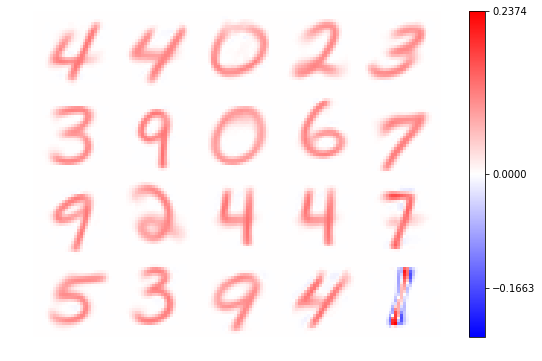

In [118]:
draw_weights(weights.cpu().numpy(), n_cols=5, n_rows=4)

In [5]:
print('\nSimpleConvNet Model')
run_test(train_X, train_y, test_X, test_y, SimpleConvNet(), 10) # 0.97 


SimpleConvNet Model
Final Validation Results - Epoch: 10  Avg accuracy: 0.97 Avg loss: 0.09


In [9]:
print('\nBioClassifier Model')
run_test(train_X, train_y, test_X, test_y, BioClassifier(BioCell(weights, .1, 10)), 100) # 0.10 


BioClassifier Model
Final Validation Results - Epoch: 100  Avg accuracy: 0.10 Avg loss: 2.70


In [7]:
print('\nSimpleBioClassifier Model')
run_test(train_X, train_y, test_X, test_y, SimpleBioClassifier(weights, 10), 100, 1e-2) # 0.90 


SimpleBioClassifier Model
Final Validation Results - Epoch: 100  Avg accuracy: 0.90 Avg loss: 4.08


In [12]:
print('\nBioConvClassifier Model')
run_test(train_X, train_y, test_X, test_y, BioConvClassifier(weights, 10), 20, 1e-2) # 0.11


BioConvClassifier Model
Final Validation Results - Epoch: 20  Avg accuracy: 0.11 Avg loss: -89299034.05


In [28]:
print('\nBioConvClassifier2 Model')
run_test(train_X, train_y, test_X, test_y, BioConvClassifier2(weights), 10, 1e-2) # 0.11 


BioConvClassifier2 Model
Final Validation Results - Epoch: 10  Avg accuracy: 0.11 Avg loss: 2.30


In [ ]:
print('\nBioClassifier w/ BioCell2 Model')
run_test(train_X, train_y, test_X, test_y, BioClassifier(BioCell2(weights)), 10) # 0.10


BioClassifier w/ BioCell2 Model


In [ ]:
print('\nBioClassifier w/ BioCell3 Model')
run_test(train_X, train_y, test_X, test_y, BioClassifier(BioCell3(weights)), 100) # 0.10

In [95]:
'''
200 epochs: 0.27 (200 epochs) 
switched WxH: 0.52
lr=1e-3: 0.94 -- SimpleConvNet got .97, modern SOTA is + .99
300 epochs: 0.97 
without switched WxH (takes 488s): 0.96
batch_size=1024 (takes 169s): 0.97 
batch_size=2048 (takes 168s): 0.97 
batch_size=3584 (takes 166s): 0.97 
nn.DataParallel (takes 167s): 0.97 -- undo
'''
print('\nBioClassifier w/ BioCell3 Model w/ BioLoss')
model = BioClassifier(BioCell3(weights))
run_test(train_X, train_y, test_X, test_y, model, 300, batch_size=3584, lr=1e-4, loss=BioLoss(m=6))  


BioClassifier w/ BioCell3 Model w/ BioLoss
Final Validation Results - Epoch: 300  Avg accuracy: 0.97 Avg loss: 1174077.06 Took: 168s


In [96]:
file = '../data/0010_model.pkl'
torch.save(model, file)